In [14]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

#Confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

#WordCloud
from wordcloud import WordCloud, get_single_color_func
from os import path
from PIL import Image

[nltk_data] Downloading package punkt to /Users/bruger/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bruger/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/bruger/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 1.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
import os



df_train= pd.read_csv('data.csv')
print(df_train.shape)
df_train.head()


(1539, 9)


,Unnamed: 0,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,"8,06,229","46,149",30.5k,"100,000 years ago, at least six human species ...",history
1,1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,"3,67,056","12,879","6,538","""Diamond has written a book of remarkable scop...",history
2,2,A People's History of the United States,4.07,Howard Zinn,"2,24,620","6,509","2,354","In the book, Zinn presented a different side o...",history
3,3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,"6,13,157","36,644",64.2k,Author Erik Larson imbues the incredible event...,history
4,4,The Diary of a Young Girl,4.18,Anne Frank,"33,13,033","35,591","4,621",Discovered in the attic in which she spent the...,history


thriller           481
fantasy            348
romance            111
horror             100
history             99
psychology          99
travel              98
science             79
sports              79
science_fiction     45
Name: genre, dtype: int64


/Users/bruger/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='genre'>

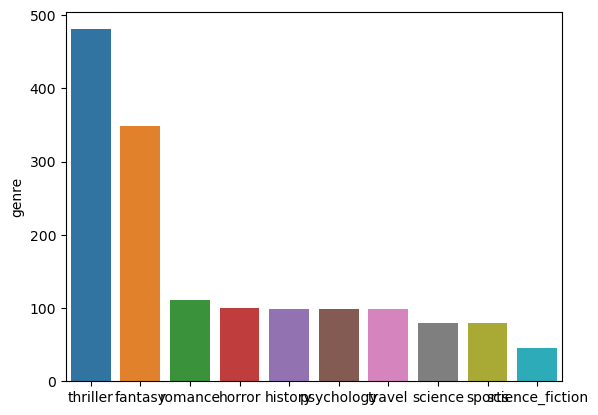

In [17]:
x=df_train['genre'].value_counts()
print(x)
sns.barplot(x.index,x)


In [18]:
ext = "   This is a message to be cleaned. It may involve some things like: , ?, :, ''  adjacent spaces and tabs     .  "

#convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text

text=preprocess(text)
print(text)  #text is a string

#convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text

text=preprocess(text)
print(text)  #text is a string

this is a message to be cleaned it may involve some things like adjacent spaces and tabs
this is a message to be cleaned it may involve some things like adjacent spaces and tabs


In [28]:
#3. LEXICON-BASED TEXT PROCESSING EXAMPLES
 
#1. STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

text=stopword(text)
print(text)

#2. STEMMING
 
# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

#3. LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

text = lemmatizer(text)
print(text)

messag clean may involv thing like adjac space tab
messag clean may involv thing like adjac space tab
messag clean may involv thing like adjac space tab


In [29]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

df_train['clean_text'] = df_train['synopsis'].apply(lambda x: finalpreprocess(x))
df_train.head()

with open('cleansedData.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(df_train, f, pickle.HIGHEST_PROTOCOL)

## Load denne pickle

In [30]:
with open('cleansedData.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    df_train = pickle.load(f)

In [31]:
# create Word2vec model
#here words_f should be a list containing words from each document. say 1st row of the list is words from the 1st document/sentence
#length of words_f is number of documents/sentences in your dataset
df_train['clean_text_tok']=[nltk.word_tokenize(i) for i in df_train['clean_text']] #convert preprocessed sentence to tokenized sentence
model = Word2Vec(df_train['clean_text_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it


w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))  #combination of word and its vector

#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [32]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
 
# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_train, X_val, y_train, y_val = train_test_split(df_train["clean_text"],
                                                  df_train["genre"],
                                                  test_size=0.2,
                                                  shuffle=True)
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will 
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible


#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

## Confusion Matrix

In [33]:
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix: \n' ,confusion_matrix(y_predict, y_val))

                 precision    recall  f1-score   support

        fantasy       0.77      0.91      0.83        66
        history       0.73      0.65      0.69        17
         horror       0.33      0.05      0.08        22
     psychology       0.69      0.79      0.73        14
        romance       0.83      0.18      0.29        28
        science       1.00      0.57      0.73        21
science_fiction       1.00      0.07      0.13        14
         sports       0.92      0.73      0.81        15
       thriller       0.61      0.97      0.75        96
         travel       0.77      0.67      0.71        15

       accuracy                           0.70       308
      macro avg       0.77      0.56      0.58       308
   weighted avg       0.72      0.70      0.65       308

Confusion Matrix: 
 [[60  0  5  0  6  0  4  0  1  2]
 [ 0 11  0  0  0  1  2  0  0  1]
 [ 0  0  1  0  0  1  0  0  1  0]
 [ 0  1  0 11  0  4  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  1  0]
 [ 0  0  0  0 

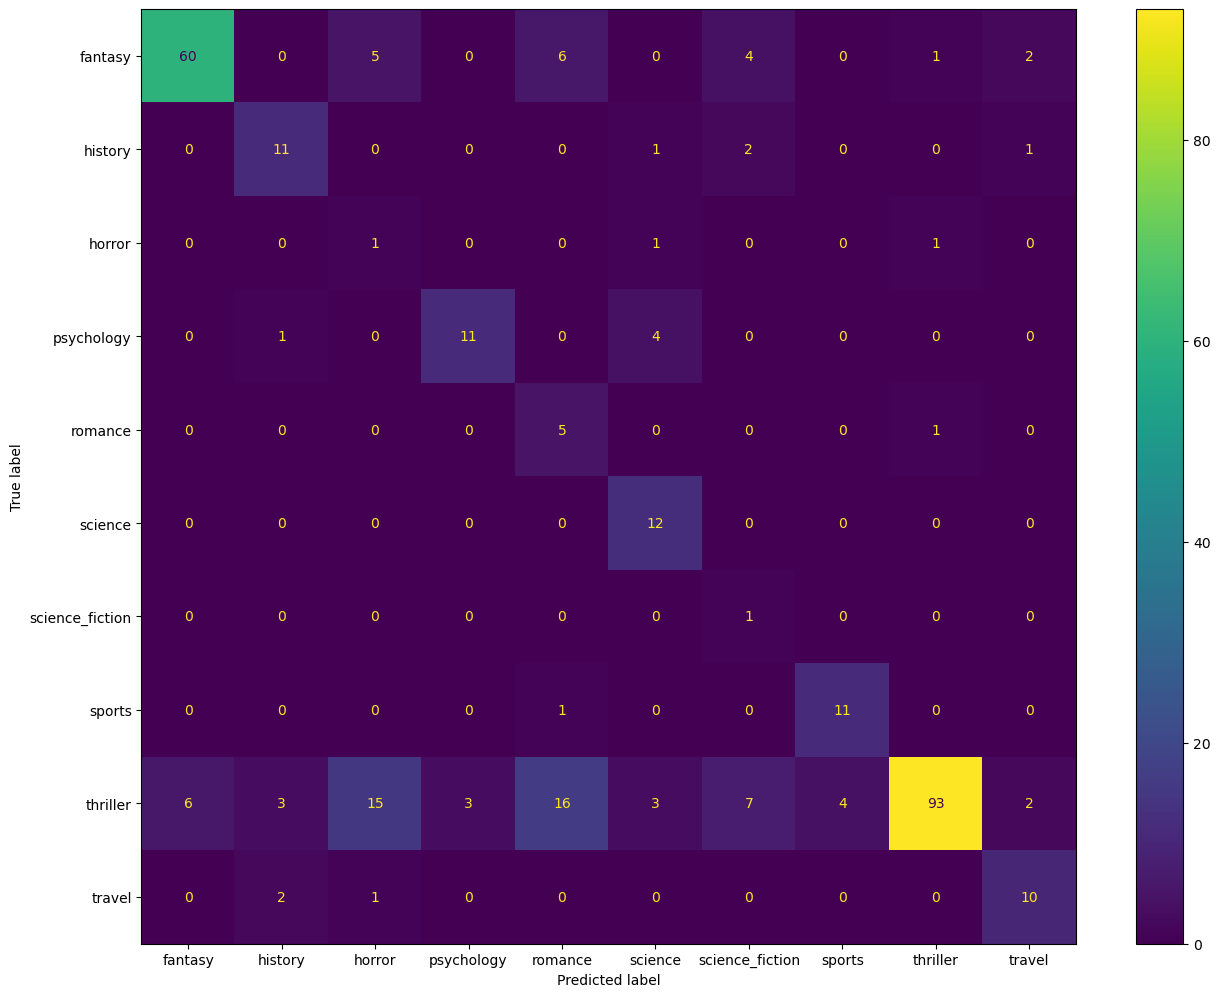

In [34]:
ConfusionMatrixDisplay.from_predictions(y_predict,y_val)  
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=(0,0,2.1,2.1));
plt.savefig('test.pdf',bbox_inches='tight')
plt.show()

## Wordclouds

In [53]:
with open('cleansedData.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    df_history = pickle.load(f)

##df_history = df_history.groupby('genre')
##df_history.get_group('history')

his = df_train.loc[df_train['genre']== 'history']
fan = df_train.loc[df_train['genre']=='fantasy']
thr = df_train.loc[df_train['genre']=='thriller']
hor = df_train.loc[df_train['genre']=='horror']
sci = df_train.loc[df_train['genre']=='science']
rom = df_train.loc[df_train['genre']=='romance']
sciFi = df_train.loc[df_train['genre']=='science_fiction']
spor = df_train.loc[df_train['genre']=='sports']
tra = df_train.loc[df_train['genre']=='travel']
psy = df_train.loc[df_train['genre']=='psychology']

## History Wordcloud

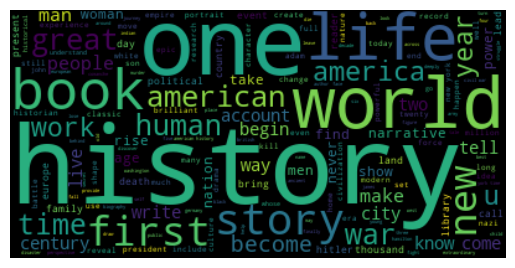

In [50]:
## Vi har prøvet med map og nested join, men der kommer problemer hver gang vi skal lave en wordcloud på vores groupby df_history



text = ' '.join(genre for genre in his.clean_text)

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Fantasy Wordcloud

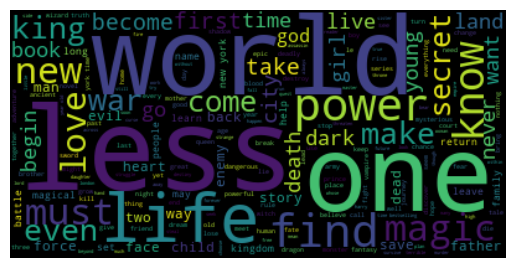

In [56]:
text1 = ' '.join(genre for genre in fan.clean_text)

wordcloud = WordCloud().generate(text1)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Thriller wordcloud

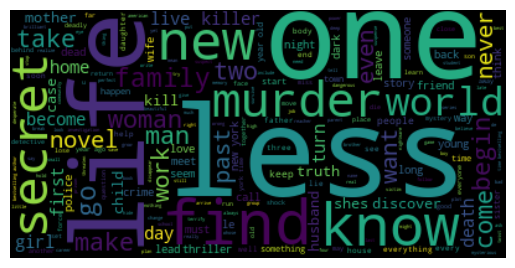

In [57]:
text2 = ' '.join(genre for genre in thr.clean_text)

wordcloud = WordCloud().generate(text2)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## horror wordcloud

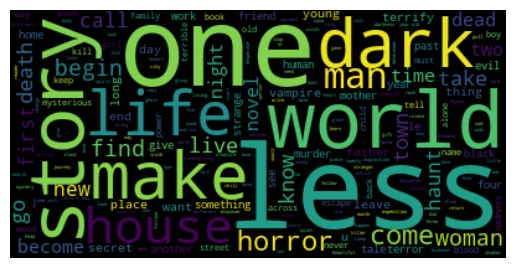

In [58]:
text3 = ' '.join(genre for genre in hor.clean_text)

wordcloud = WordCloud().generate(text3)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Science Wordcloud

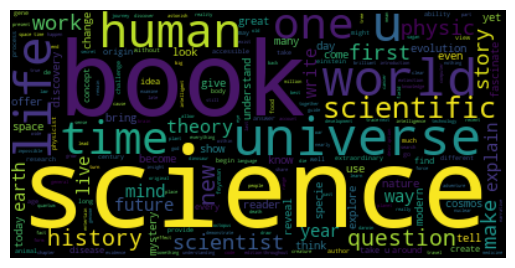

In [59]:
text4 = ' '.join(genre for genre in sci.clean_text)

wordcloud = WordCloud().generate(text4)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Science fiction wordcloud

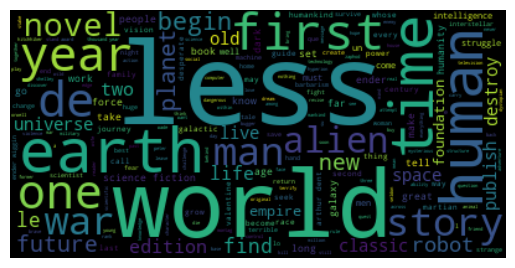

In [60]:
text5 = ' '.join(genre for genre in sciFi.clean_text)

wordcloud = WordCloud().generate(text5)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Travel wordcloud

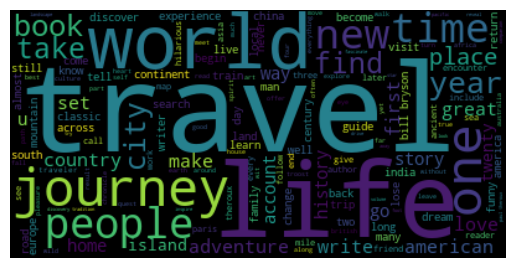

In [61]:
text6 = ' '.join(genre for genre in tra.clean_text)

wordcloud = WordCloud().generate(text6)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Romance wordcloud

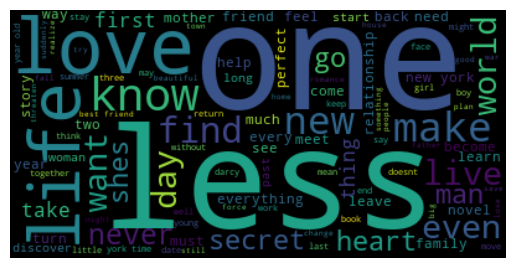

In [62]:
text7 = ' '.join(genre for genre in rom.clean_text)

wordcloud = WordCloud().generate(text7)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Psychology wordcloud

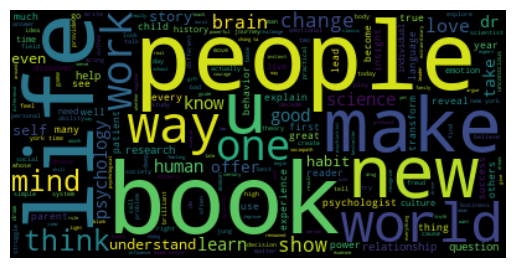

In [63]:
text8 = ' '.join(genre for genre in psy.clean_text)

wordcloud = WordCloud().generate(text8)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sports wordcloud 

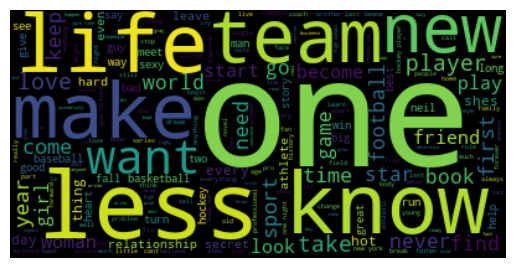

In [65]:
text8 = ' '.join(genre for genre in spor.clean_text)

wordcloud = WordCloud().generate(text8)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()